In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy import stats

In [2]:
df = pd.read_csv("./Mall_Customers.csv",encoding='unicode_escape') #Reading the csv file 
df['Annual Income'] = df['Annual Income (k$)'] #Renaming the column
df['Spending Score'] = df['Spending Score (1-100)'] #Renaming the column
df.drop(['Annual Income (k$)','Spending Score (1-100)'],axis=1,inplace=True) #Dropping the columns

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Customer Dataset Description:

**CustomerID**: Unique ID assigned to each customer. This identifier distinguishes one customer from another and is used to track customer interactions and transactions.

**Gender**: Gender of the customer. This categorical variable indicates whether the customer is male or female.

**Age**: Age of the customer. This numerical variable represents the age of the customer in years.

**Annual Income (k$)**: Annual income of the customer, measured in thousands of dollars. This numerical variable indicates the yearly income earned by the customer.

**Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature. This numerical variable ranges from 1 to 100 and reflects the mall's assessment of the customer's spending habits and preferences.

This dataset provides valuable information about customers, including their demographic characteristics, income levels, and spending behavior. It can be used for various analyses, such as customer segmentation, profiling, and targeted marketing strategies.


We check for the type of values in each column and how many null values are there.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dealing with NULL values of columns by removing them as we can't generate them using statistical methods for others we will us imputers.(No Null values in this dataset)

In [5]:
df = df.drop_duplicates() #removing duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()  #describing the data

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Handling Outliers by removing them as they are very few in number.

Age: 


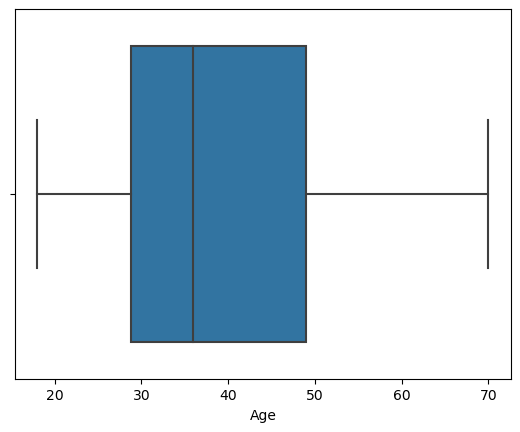

Annual Income: 


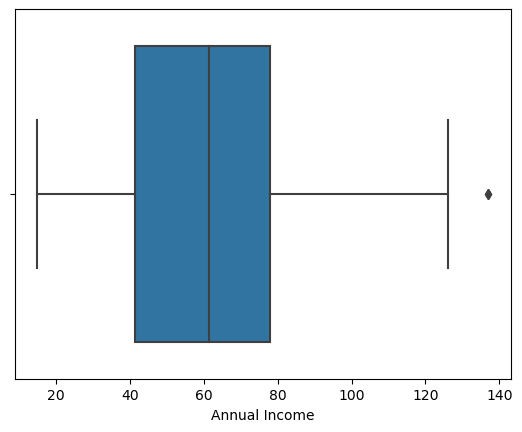

Spending Score: 


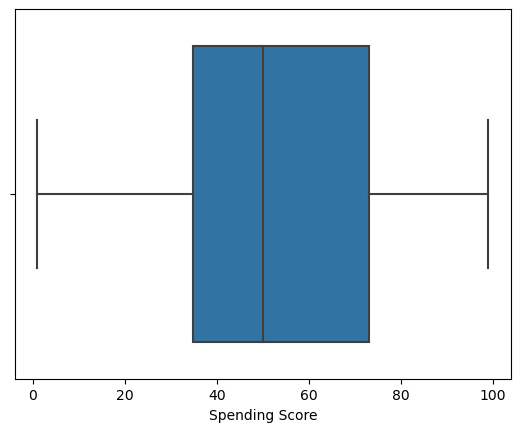

In [7]:
list1 = ['Age','Annual Income','Spending Score'] #list of columns to be plotted
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df[str(i)])
    plt.show()

In [8]:
scaler = MinMaxScaler() #scaling the data
scaled_df = pd.DataFrame(scaler.fit_transform(df[["Age","Annual Income", "Spending Score"]]), columns=["Age","Annual Income", "Spending Score"])
df[["Age","Annual Income", "Spending Score"]] = scaled_df[['Age','Annual Income', 'Spending Score']]
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


Drawing a heatmap between Quantity and Unit price to find correlation of variables.

In [9]:
df = pd.get_dummies(df,drop_first=False) #one hot encoding
df = df.drop("Gender_Male",axis=1) #dropping the column
df['Gender_Female']=df["Gender_Female"].astype(int) #converting the column to int 0 = Male and 1 = Female
df.head()

,CustomerID,Age,Annual Income,Spending Score,Gender_Female
0,1,0.019231,0.000000,0.387755,0
1,2,0.057692,0.000000,0.816327,0
2,3,0.038462,0.008197,0.051020,1
3,4,0.096154,0.008197,0.775510,1
4,5,0.250000,0.016393,0.397959,1


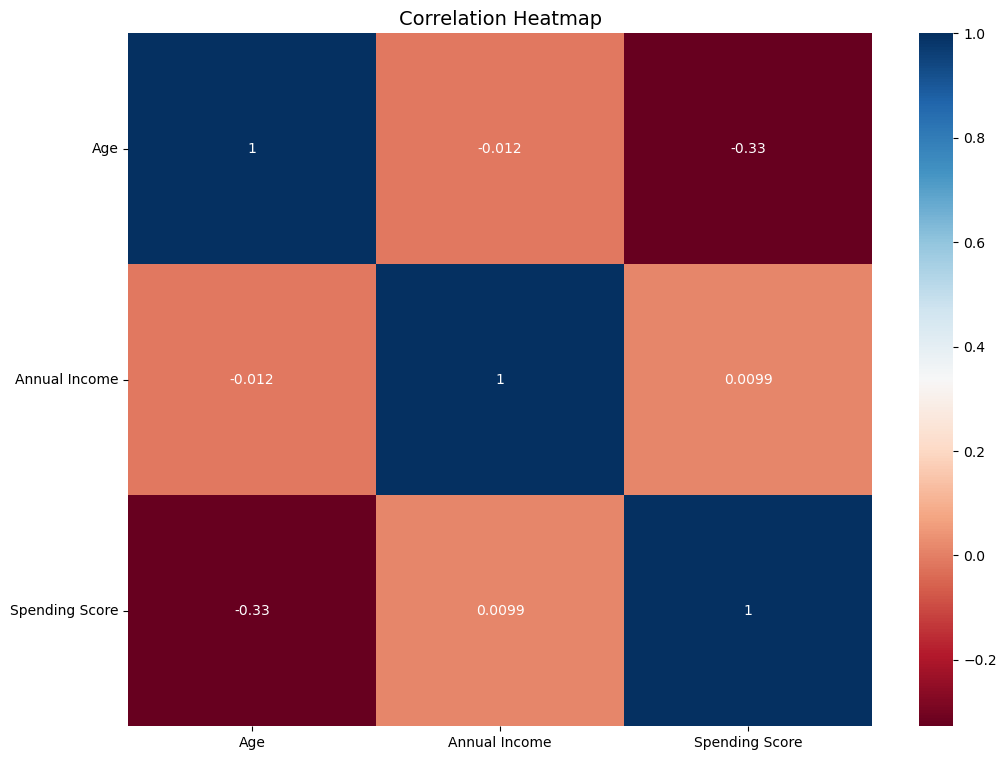

In [10]:
plt.figure(figsize=(12,9))
sns.heatmap(df[["Age","Annual Income","Spending Score"]].corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation=0)
plt.show()

Age and Spending Score have a good negative correlation of -0.33 indicating that younger customers tend to spend more.

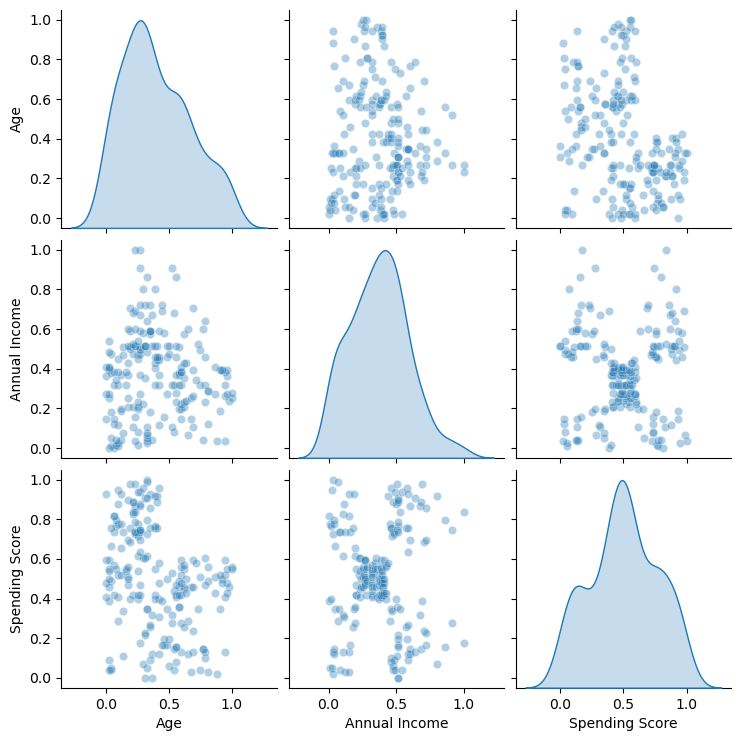

In [11]:
sns.pairplot(df[["Age","Annual Income", "Spending Score"]], diag_kind='kde',plot_kws={'alpha': 0.35}) #Bivariate analysis

We can see that customers with Income within 40-70k have a higher spending score.

  File "c:\Users\manje\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\manje\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manje\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\manje\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Text(0, 0.5, 'Inertia')

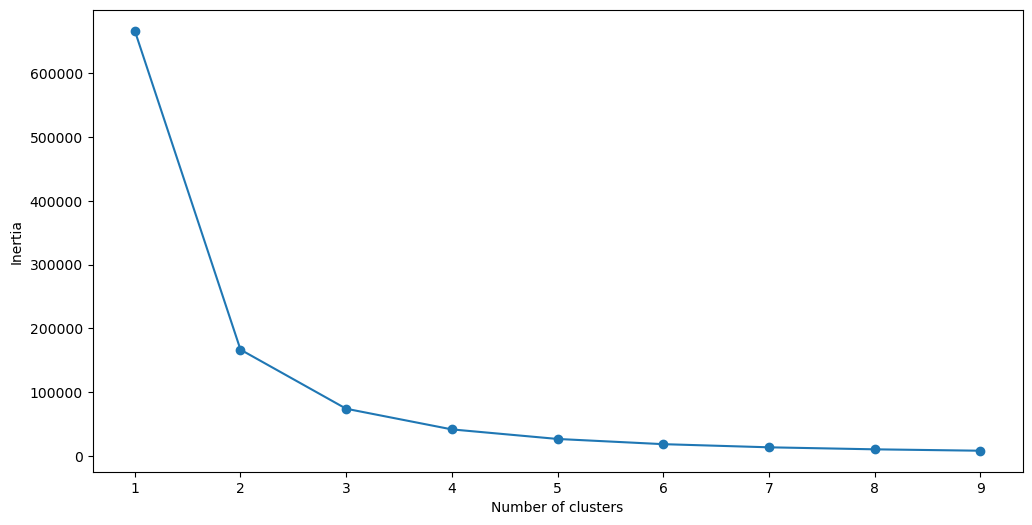

In [12]:
inertia = []

for n in range(1,10):
    kmeans = KMeans(n_clusters=n, n_init= 10, random_state=42)
    kmeans.fit(df)
    inertia_ = kmeans.inertia_
    inertia.append(inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':inertia})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

So we see bending at so optimal number of clusters is 3.

In [13]:
model =  kmeans = KMeans(n_clusters=3, n_init= 10, random_state=42)
model.fit(df)

# silhouette score
print(silhouette_score(df, model.labels_, metric='euclidean'))

0.58349448853494


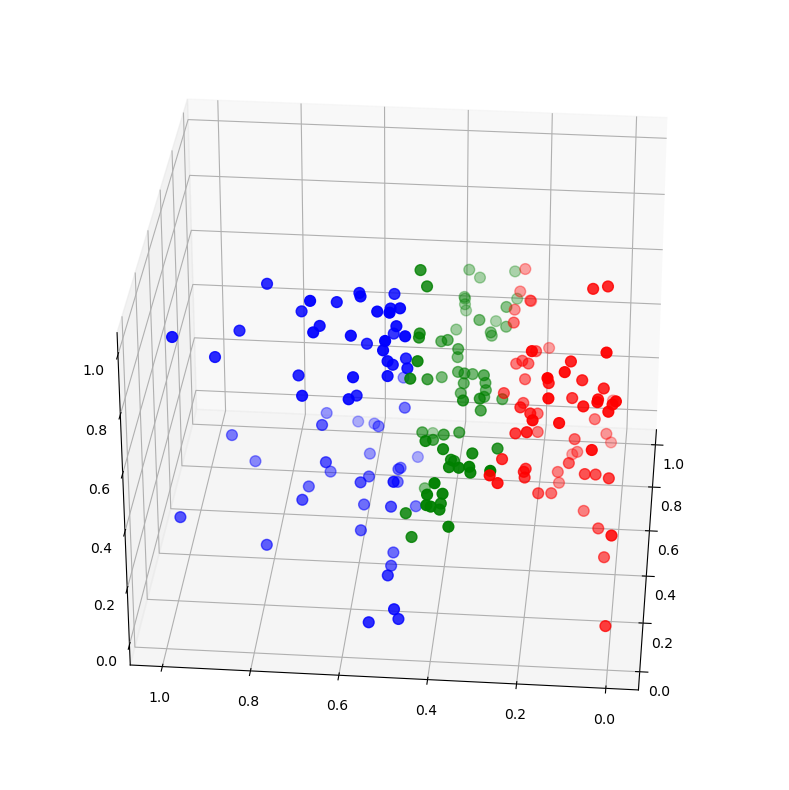

In [14]:
df["label"] = model.labels_ #predicting the labels
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income"][df.label == 0], df["Spending Score"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income"][df.label == 1], df["Spending Score"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income"][df.label == 2], df["Spending Score"][df.label == 2], c='green', s=60)

ax.scatter(df.Age[df.label == 3], df["Annual Income"][df.label == 3], df["Spending Score"][df.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

We observe clear distinction between the clusters and can be used for targeted marketing strategies.

In [24]:
cluster_df = pd.read_csv('./Mall_Customers.csv',encoding='unicode_escape')
cluster_df['Annual Income'] = pd.read_csv('./Mall_Customers.csv',encoding='unicode_escape')['Annual Income (k$)']
cluster_df['Spending Score'] = pd.read_csv('./Mall_Customers.csv',encoding='unicode_escape')['Spending Score (1-100)']
cluster_df['label'] = df['label']
cluster_df.drop(['Annual Income (k$)','Spending Score (1-100)','Gender'],axis=1,inplace=True)
cluster_df = df.groupby(['label'], as_index=False).mean()
cluster_df

,label,CustomerID,Age,Annual Income,Spending Score,Gender_Female
0,0,167.5,0.351690,0.610035,0.501391,0.530303
1,1,34.0,0.390643,0.138366,0.501675,0.597015
2,2,101.0,0.459816,0.375459,0.503046,0.552239


<Axes: xlabel='label', ylabel='Age'>

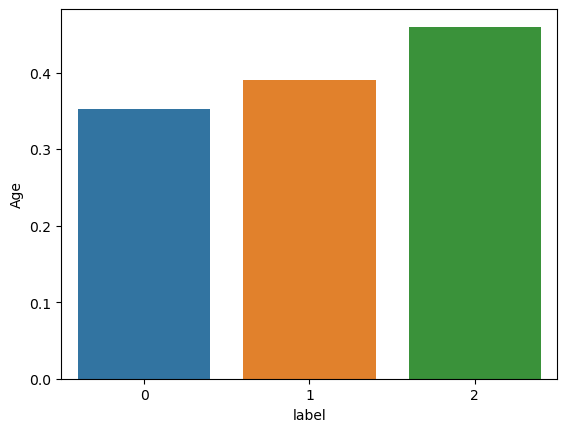

In [16]:
sns.barplot(x='label',y='Age',data=cluster_df)

<Axes: xlabel='label', ylabel='Annual Income'>

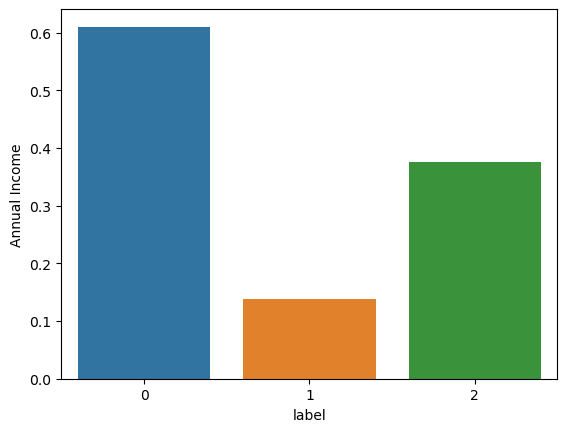

In [17]:
sns.barplot(x='label',y='Annual Income',data=cluster_df)

<Axes: xlabel='label', ylabel='Spending Score'>

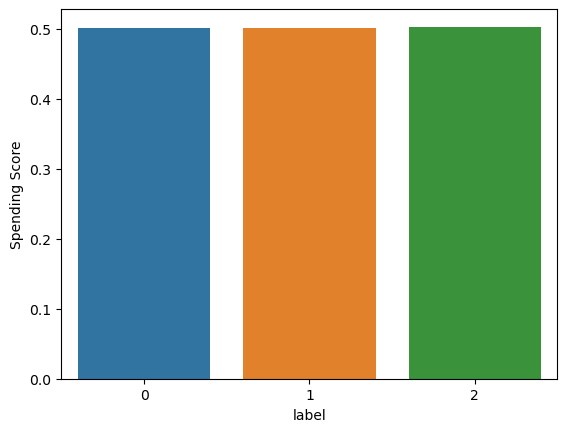

In [18]:
sns.barplot(x='label',y='Spending Score',data=cluster_df)

### Category Analysis:

#### Label 0:
- **Age**: The average age is 36.29 years.
- **Annual Income**: The average annual income is $89,424.24.
- **Spending Score**: The average spending score is 50.14.

#### Label 1:
- **Age**: The average age is 38.31 years.
- **Annual Income**: The average annual income is $31,880.60.
- **Spending Score**: The average spending score is 50.16.

#### Label 2:
- **Age**: The average age is 41.91 years.
- **Annual Income**: The average annual income is $60,805.97.
- **Spending Score**: The average spending score is 50.30.

### Interpretation:

- **Age**: There doesn't seem to be a significant difference in the average age across label categories.
- **Annual Income**: Label category 0 has the highest average annual income, followed by label category 2, while label category 1 has the lowest average annual income.
- **Spending Score**: The spending scores are relatively consistent across all label categories, with minor variations.

### Insights:

- Label category 0 appears to consist of customers with higher annual incomes compared to the other categories.
- Label category 1 consists of customers with the lowest average annual income.
- Despite differences in annual income, the spending scores are similar across all label categories.

### Further Analysis:

- Further analysis, such as visualization and statistical tests, can provide additional insights into the differences between label categories and their significance.


In [25]:
cluster_df = df.groupby(['label'], as_index=False).mean()


,label,CustomerID,Age,Annual Income,Spending Score,Gender_Female
0,0,167.5,0.351690,0.610035,0.501391,0.530303
1,1,34.0,0.390643,0.138366,0.501675,0.597015
2,2,101.0,0.459816,0.375459,0.503046,0.552239


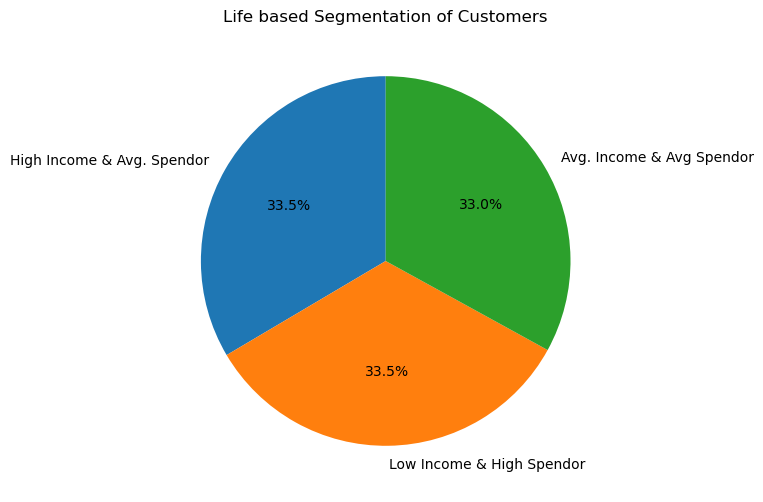

In [27]:
cluster_counts = df['label'].value_counts()

# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['High Income & Avg. Spendor','Low Income & High Spendor','Avg. Income & Avg Spendor',]

# Create a pie chart
plt.figure(figsize=(8, 6),dpi=100)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Life based Segmentation of Customers')
plt.show()

From the pie chart we can observe that the customers from all categories are equal in number.